In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class  
import math

In [2]:
Tcmb = 2.7255 #2.726
n_power_1 = 0
dm_mass_1 =  0 #GeV
sigma_dmb_1 = 0
l_2 = 5000

n_power_2 = -4
dm_mass_2 =  1 #GeV
sigma_dmb_2 = 4.543995585887277e-41 #SO
l_1 = 5000

In [3]:
params_1 = {'output': 'tCl pCl lCl','l_max_scalars': l_1,'lensing': 'no',
                    'omega_dmb': 0.12,
                    'h': 0.6730804,
                    'omega_b': 0.0224,
                    'A_s': 2.2e-9,
                    'n_s': 0.96,
                    'tau_reio': 0.07,
                    'omega_cdm' :1e-22,
                    'm_dmb': dm_mass_1,'n_dmb': n_power_1,'sigma_dmb': sigma_dmb_1,
                    'N_ur': 2.0328,'N_ncdm': 1,'m_ncdm': 0.06,'T_ncdm':0.71611,
                    'reionization_optical_depth_tol': 1e-07,
                    'perturb_sampling_stepsize':0.01,
                    'k_max_tau0_over_l_max' : 6,'gauge' : 'synchronous'}
    
params_2 = {'output': 'tCl pCl lCl','l_max_scalars': l_2,'lensing': 'no',
                    'omega_dmb': 0.12,
                    'h': 0.6730804,
                    'omega_b': 0.0224,
                    'A_s': 2.2e-9,
                    'n_s': 0.96,
                    'tau_reio': 0.07,
                    'omega_cdm' :1e-22,
                    'm_dmb': dm_mass_2,'n_dmb': n_power_2,'sigma_dmb': sigma_dmb_2,
                    'N_ur': 2.0328,'N_ncdm': 1,'m_ncdm': 0.06,'T_ncdm':0.71611,'reionization_optical_depth_tol': 1e-07,
                    'perturb_sampling_stepsize':0.01,
                    'k_max_tau0_over_l_max' : 6,'gauge' : 'synchronous'}
M1 = Class()
M1.set(params_1)
M1.compute()
cl_tot_1 = M1.raw_cl(l_1)
M1.struct_cleanup()
M1.empty()
cl_TT_1 = cl_tot_1['tt']
cl_EE_1 = cl_tot_1['ee']
ell_1 = cl_tot_1['ell']

Cl_est_kk1 = []
for i in ell_1:
    if i < 2:
        Cl_est_kk1.append(0)
    else:
        Cl_est_kk1.append(1/4*(math.factorial(i+2)/math.factorial(i-2))*cl_tot_1['pp'][i])
        
Cl_kk_1 = np.array(Cl_est_kk1)


M2 = Class()
M2.set(params_2)
M2.compute()
cl_tot_2 = M2.raw_cl(l_2)
M2.struct_cleanup()
M2.empty()
cl_TT_2 = cl_tot_2['tt']
cl_EE_2 = cl_tot_2['ee']
ell_2 = cl_tot_2['ell']

Cl_est_kk2 = []
for i in ell_2:
    if i < 2:
        Cl_est_kk2.append(0)
    else:
        Cl_est_kk2.append(1/4*(math.factorial(i+2)/math.factorial(i-2))*cl_tot_2['pp'][i])
        
Cl_kk_2 = np.array(Cl_est_kk2)

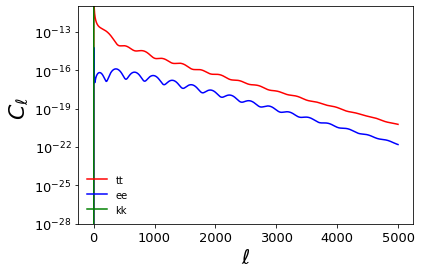

In [4]:
plt.plot(cl_TT_1, 'r-', label="tt")
plt.plot(cl_EE_1, 'b-', label="ee")
plt.plot(Cl_kk_1, 'g-', label="kk")
plt.yscale('log')
plt.ylabel(r'$\    \ C_{\ell}$',size=22)
plt.xlabel(r'$\ell$',size=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower left', frameon=False)
#plt.xlim([2, 3000])
plt.ylim(1e-28,1e-11)

plt.show()

In [30]:
#error bars with 1mK-arc min noise and 1.5 arcmin beam full-width half maximum (FWHM) for 2<l<2000
#binned in l with a bin width of dl=50.

theta_fwhm = 1.4 #for S4  - arcmin

sigma_b = (theta_fwhm*0.00742) /60
W_l = np.exp(- ((ell_1**2)*(sigma_b**2) / 2) )#window function 
inv_w_x = 1 # mK-arcmin
            #inverse statistical weights per unit solid angle, 
            #a measure of experimental sensitivity independent of pixel size 

e_tt_p =np.sqrt(
    (2 /(2*ell_1 +1))   *   (((cl_TT_1 + (inv_w_x/(W_l**2))))**2)
               )

e_ee_p =np.sqrt(
    (2 /(2*ell_1 +1))   *   (((cl_EE_1 + (inv_w_x/(W_l**2))))**2)
               )

e_kk_p =np.sqrt(
    (2 /(2*ell_1 +1))   *   (((Cl_kk_1 + (inv_w_x/(W_l**2))))**2)
               )

In [31]:
bin_e_tt_p = []

sum_i =0
for n, i in enumerate(e_tt_p[3:3001]):
    if n %49 == 0:
        bin_e_tt_p.append(1.0* sum_i / 50)        
        sum_i = 0
    sum_i += i
    
bin_e_ee_p = []

for n, i in enumerate(e_ee_p[3:3000]):
    if n %49 == 0:
        bin_e_ee_p.append(1.0* sum_i / 50)        
        sum_i = 0
    sum_i += i
    
bin_e_kk_p = []

for n, i in enumerate(e_kk_p[3:3000]):
    if n %49 == 0:
        bin_e_kk_p.append(1.0* sum_i / 50)        
        sum_i = 0
    sum_i += i

<ipython-input-32-7fe9a2db67d2>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot( 100*(cl_TT_2 - cl_TT_1) /cl_TT_1,'k-',label="m={} crosssection={} n={} ".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)))


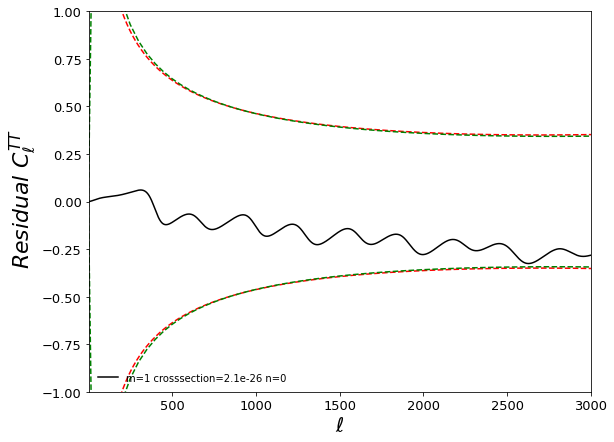

In [32]:
fig, ax = plt.subplots(figsize=(9, 7))
plt.plot( 100*(cl_TT_2 - cl_TT_1) /cl_TT_1,'k-',label="m={} crosssection={} n={} ".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)))
plt.plot(ell_1,100*(e_tt_p/np.sqrt(50)), 'r--')
plt.plot(ell_1,-100*(e_tt_p/np.sqrt(50)), 'r--')
plt.plot([i* 50 for i in range(len(bin_e_tt_p))], 100*(bin_e_tt_p/np.sqrt(50)), 'g--')
plt.plot([i* 50 for i in range(len(bin_e_tt_p))], -100*(bin_e_tt_p/np.sqrt(50)), 'g--')

plt.ylabel(r'$\ Residual    \ C_{\ell}^{TT}$',size=22)
plt.xlabel(r'$\ell$',size=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower left', frameon=False)
plt.xlim([2, 3000])
plt.ylim(-1,1)

plt.show()
#fig.savefig("fisher_plots/residual_CL_TT_n={}_m={}_sigma_.png".format(str(n_power_2),str(dm_mass_2)))


<ipython-input-33-d472693431a4>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot( 100*(cl_EE_2 - cl_EE_1) /cl_EE_1,'k-',label="m={} crosssection={} n={} ".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)))


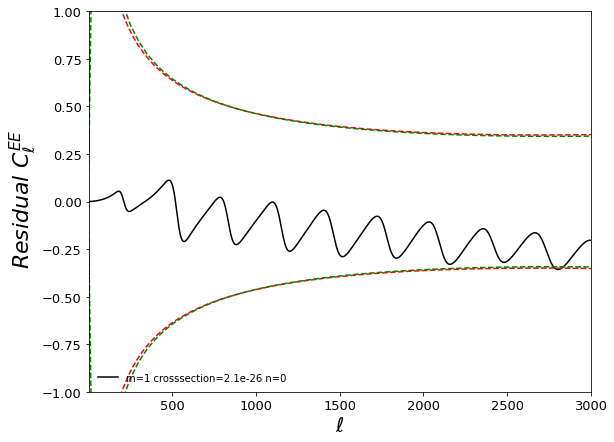

In [33]:
fig, ax = plt.subplots(figsize=(9, 7))
plt.plot( 100*(cl_EE_2 - cl_EE_1) /cl_EE_1,'k-',label="m={} crosssection={} n={} ".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)))
plt.plot(ell_1,100*(e_tt_p/np.sqrt(50)), 'r--')
plt.plot(ell_1,-100*(e_tt_p/np.sqrt(50)), 'r--')
plt.plot([i* 50 for i in range(len(bin_e_ee_p))], 100*(bin_e_ee_p/np.sqrt(50)), 'g--')
plt.plot([i* 50 for i in range(len(bin_e_ee_p))], -100*(bin_e_ee_p/np.sqrt(50)), 'g--')

plt.ylabel(r'$\ Residual    \ C_{\ell}^{EE}$',size=22)
plt.xlabel(r'$\ell$',size=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower left', frameon=False)
plt.xlim([2, 3000])
plt.ylim(-1,1)

plt.show()
fig.savefig("fisher_plots/residual_CL_EE_n={}_m={}_sigma_.png".format(str(n_power_2),str(dm_mass_2)))


<ipython-input-34-4c1f36c4a44f>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot( 100*(Cl_kk_2 - Cl_kk_1) /Cl_kk_1,'k-',label="m={} crosssection={} n={} ".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)))


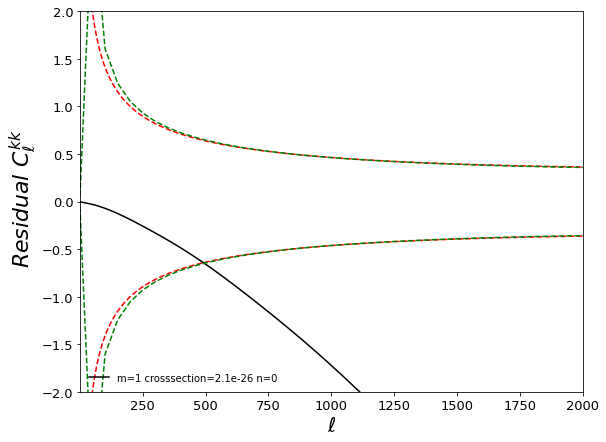

In [34]:
fig, ax = plt.subplots(figsize=(9, 7))
plt.plot( 100*(Cl_kk_2 - Cl_kk_1) /Cl_kk_1,'k-',label="m={} crosssection={} n={} ".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)))
plt.plot(ell_1,100*(e_tt_p/np.sqrt(50)), 'r--')
plt.plot(ell_1,-100*(e_tt_p/np.sqrt(50)), 'r--')
plt.plot([i* 50 for i in range(len(bin_e_kk_p))], 100*(bin_e_kk_p/np.sqrt(50)), 'g--')
plt.plot([i* 50 for i in range(len(bin_e_kk_p))], -100*(bin_e_kk_p/np.sqrt(50)), 'g--')

plt.ylabel(r'$\ Residual    \ C_{\ell}^{kk}$',size=22)
plt.xlabel(r'$\ell$',size=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower left', frameon=False)
plt.xlim([2, 2000])
plt.ylim(-2,2)

plt.show()
fig.savefig("fisher_plots/residual_CL_kk_n={}_m={}_sigma_.png".format(str(n_power_2),str(dm_mass_2)))


In [10]:
#stage 4 noise
a = np.load('noise/CMB_S4_noise.npy')
nl_tt_S4 = a[0] 
nl_ee_S4 = a[1] 
nl_kk_S4 = a[2]

In [11]:
#SO (baseline) noise 
# All noise spectra are for lensing convergence; no factors of ell or 2pi.
# i.e. these can be plotted directly against C_ell_kappa_kappa.

data = np.genfromtxt('noise/SO/nlkk_v3_1_0deproj0_SENS1_fsky0p4_it_lT30-3000_lP30-5000.dat',
                     dtype=None,
                     delimiter='')
data2 = np.genfromtxt('noise/SO/Apr17_mv_nlkk_deproj0_SENS1_fsky_16000_iterOn.csv',
                     dtype=None,
                     delimiter='')
noise_dat = np.transpose(data)
noise_dat2 = np.transpose(data2)
nl_tt_dat = noise_dat[1]
nl_te_dat = noise_dat[2]
nl_ee_dat = noise_dat[3]
n_kk_3000 = noise_dat2[1]
# ells, N_lensing_TT, N_lensing_TE, N_lensing_EE, N_lensing_TB, N_lensing_EB, N_lensing_Pol (EE+EB), N_lensing_MV (all), N_curl_TT, N_curl_TE, N_curl_EE, N_curl_TB, N_curl_EB, N_curl_Pol (EE+EB), N_curl_MV (all)

nl_tt_SO = [1e100 for i in range(0,5000, 1)]
nl_tt_SO[2:5000] = nl_tt_dat

nl_ee_SO = [1e100 for i in range(0,5000, 1)]
nl_ee_SO[2:5000] = nl_ee_dat

nl_te_SO = [1e100 for i in range(0,5000, 1)]
nl_te_SO[2:5000] = nl_te_dat

nl_kk_SO = [1e100 for i in range(0, 5000, 1)]
nl_kk_SO[20:2999] = n_kk_3000

In [12]:
nl_kk_CVL = np.genfromtxt('noise/cv-limited/lensing_cv.txt',
                     dtype=None,
                     delimiter='')

In [13]:
sT = (33. * (np.pi/60./180. ))/(1.0e6*Tcmb) #Unitless to match fiducal Cl's
sP = (56. * (np.pi/60./180. ))/(1.0e6*Tcmb) #Unitless to match fiducal Cl's
f_sky = 0.65
theta_fwhm = 7. * (np.pi/60./180.)

l_min = 2
l_max = 2500

from scipy.special import expit

N_TT = np.zeros(l_max+1, 'float64')
N_EE = np.zeros(l_max+1, 'float64')

for l in range(l_min , l_max+1):
            N_TT[l] = 0
            N_TT[l] += sT**-2 *\
                    np.exp(
                        -l*(l+1)*theta_fwhm**2/8./np.log(2.))
            N_TT[l] = 1/N_TT[l]
            N_EE[l] = 0
            N_EE[l] += sP**-2 *\
                    np.exp(
                        -l*(l+1)*theta_fwhm**2/8./np.log(2.))
            N_EE[l] = 1/N_EE[l]
N_TT[ell_1 < l_min] = 1e100
N_TT[ell_1 > l_max] = 1e100
N_EE[ell_1 < l_min] = 1e100
N_EE[ell_1 > l_max] = 1e100

#planck
#data = np.loadtxt("noise/Planck_noise.npy", delimiter = " ")
#nl_kk_planck = data[:,3]*(1.0e6*Tcmb)**2


plancknoise = np.load('noise/Planck_noise.npy')
nl_tt_planck = plancknoise[0]
nl_ee_planck = plancknoise[1]
nl_kk_planck = plancknoise[2]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2501 but corresponding boolean dimension is 5001

In [ ]:
plt.plot(nl_kk_S4, 'r--',label="nl_kk S4")
plt.plot(nl_kk_SO, 'b--',label="nl_kk SO")
plt.plot(nl_kk_planck, 'g--',label="nl_kk planck")
plt.plot(nl_kk_CVL, 'y--',label="nl_kk CV limited")

plt.plot(Cl_est_kk1, 'k-',label="Cl_kk")

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-9,1e-4)
plt.xlim(20,2500)
plt.legend(loc="upper right")
plt.title('Cl_kk + nl_kk  n=0 1 GeV - uK^2')
plt.savefig("noise_kk.png")
plt.show()

In [ ]:
plt.plot(nl_tt_S4, 'r--',label="nl_tt S4")
plt.plot(nl_tt_SO, 'b--',label="nl_tt SO")
plt.plot(nl_tt_planck, 'g--',label="nl_tt planck")
#plt.plot(nl_tt_CVL, 'y--',label="nl_tt CV limited")

plt.plot((cl_TT_1*(1.0e6*Tcmb)**2), 'k-',label="Cl_tt")

plt.yscale('log')
plt.ylim(1e-8,1e-2)
plt.xlim(2,5000)
plt.legend(loc="upper right")
plt.title(' nl_tt  ')
plt.savefig("noise_tt.png")
plt.show()

In [ ]:
plt.plot(nl_ee_S4, 'r--',label="nl_tt S4")
plt.plot(nl_ee_SO, 'b--',label="nl_tt SO")
plt.plot(nl_ee_planck, 'g--',label="nl_tt planck")
#plt.plot(nl_tt_CVL, 'y--',label="nl_tt CV limited")

plt.plot((cl_EE_1*(1.0e6*Tcmb)**2), 'k-',label="Cl_ee")


plt.yscale('log')
plt.ylim(1e-9,1e-1)
plt.xlim(2,5000)
plt.legend(loc="upper right")
plt.title(' nl_ee  ')
plt.savefig("noise_ee.png")
plt.show()